Warehouse Layout Design Optimization

Part 1: Product Allocation and Functional Area Sizing

In [1]:
# This code writes the product data table to a TXT file.

product_data = [
    ["Metric", "Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"],
    ["Annual demand (units)", "10,000", "15,000", "25,000", "2,000", "1,500", "95,000"],
    ["Order cost ($)", "50", "50", "50", "50", "50", "150"],
    ["Price/unit load ($)", "500", "650", "350", "250", "225", "150"],
    ["Space required (m²)", "10", "15", "25", "10", "12", "13"],
    ["Reserve dwell percentage (%)", "0", "0", "20%", "0", "0", "100%"],
    ["Yearly carrying cost rate (%)", "10%", "10%", "10%", "10%", "10%", "10%"]
]

with open("product_data.txt", "w") as f:
    for row in product_data:
        f.write("\t".join(row) + "\n")

In [7]:
# This code writes the flow/product data table to a TXT file.

flow_product_data = [
    ["Flow/Product", "Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"],
    ["Flow 1 (CD)", "0.0707", "0.0203", "0.0267", "0.3354", "0.4083", "0.0726"],
    ["Flow 2 (R)", "0.0849", "0.2023", "0.0420", "0.5590", "0.6804", "0.0871"],
    ["Flow 3 (RF)", "0.1061", "0.2023", "0.0054", "1.0062", "1.2248", "0.1088"],
    ["Flow 4 (F)", "0.0778", "0.2023", "0.0481", "0.0671", "0.8165", "0.0798"]
]

with open("product_cost_data.txt", "w") as f:
    for row in flow_product_data:
        f.write("\t".join(row) + "\n")

In [8]:
# This code writes the new flow/product quantity table to a TXT file.

flow_product_quantity = [
    ["Flow/Product", "Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"],
    ["Flow 1 (CD)", "20", "15", "4", "5", "15", "20"],
    ["Flow 2 (R)", "5", "5", "20", "4", "25", "5"],
    ["Flow 3 (RF)", "10", "10", "1", "5", "45", "10"],
    ["Flow 4 (F)", "15", "10", "9", "1", "30", "15"]
]

with open("product_yearly_cost.txt", "w") as f:
    for row in flow_product_quantity:
        f.write("\t".join(row) + "\n")

In [4]:
# This code writes the functional area bounds table to a TXT file.

functional_area_bounds = [
    ["Functional Area", "Lower bound (m²)", "Upper bound (m²)"],
    ["Cross-docking", "0", "15,000"],
    ["Reserve", "35,000", "75,000"],
    ["Forward", "35,000", "75,000"]
]

with open("functional_area_bounds.txt", "w") as f:
    for row in functional_area_bounds:
        f.write("\t".join(row) + "\n")

In [5]:
# This code writes the levels of space available in each functional area to a TXT file.

functional_area_levels = [
    ["Functional Area", "#Levels"],
    ["Cross-docking", "1"],
    ["Reserve", "1"],
    ["Forward", "1"]
]

with open("functional_area_levels.txt", "w") as f:
    for row in functional_area_levels:
        f.write("\t".join(row) + "\n")

In [12]:
# Calculate holding cost per unit for each product and functional area
# Uses yearly carrying cost rate, price per product, and storage cost from product_yearly_cost.txt

import csv

carry_rate = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10]  # yearly carrying cost rate for each product
price = [500, 650, 350, 250, 225, 150]             # price per unit load for each product
products = ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"]
functional_areas = ["Cross-docking", "Reserve", "RF", "Forward"]

# Read storage costs from product_yearly_cost.txt
storage = []
with open("product_yearly_cost.txt", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)  # skip header
    for row in reader:
        storage.append([float(x) for x in row[1:]])

holding_cost = []  # [functional_area, product, holding_cost]

for f, area in enumerate(functional_areas):
    for p, prod in enumerate(products):
        h_pf = carry_rate[p] * price[p] + storage[f][p]
        holding_cost.append([area, prod, round(h_pf, 2)])

# Write results to file
with open("holding_cost_per_unit.txt", "w") as f:
    f.write("Functional Area\tProduct\tHolding Cost per Unit\n")
    for row in holding_cost:
        f.write("\t".join(map(str, row)) + "\n")

In [13]:
# Calculate EOQ for each product p assigned to flow f
# EOQ = sqrt((2 * D * S) / H)
# D = annual demand, S = order cost, H = holding cost per unit (from previous calculation)

import math

# Data for each product
annual_demand = [10000, 15000, 25000, 2000, 1500, 95000]  # D
order_cost = [50, 50, 50, 50, 50, 150]                   # S

# Read holding cost per unit from holding_cost_per_unit.txt
# We'll use the same order of functional_areas and products as before
holding_cost = []  # 2D list: [functional_area][product]
with open("holding_cost_per_unit.txt", "r") as f:
    next(f)  # skip header
    for i in range(4):  # 4 functional areas
        row = []
        for j in range(6):  # 6 products
            line = f.readline()
            h = float(line.strip().split('\t')[2])
            row.append(h)
        holding_cost.append(row)

# Calculate EOQ for each product in each functional area
eoq = []  # [functional_area, product, EOQ]
functional_areas = ["Cross-docking", "Reserve", "RF", "Forward"]
products = ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"]

for f, area in enumerate(functional_areas):
    for p, prod in enumerate(products):
        D = annual_demand[p]
        S = order_cost[p]
        H = holding_cost[f][p]
        EOQ = math.sqrt((2 * D * S) / H) if H > 0 else 0
        eoq.append([area, prod, round(EOQ, 2)])

# Write EOQ results to file
with open("eoq_per_product_flow.txt", "w") as f:
    f.write("Functional Area\tProduct\tEOQ\n")
    for row in eoq:
        f.write("\t".join(map(str, row)) + "\n")

In [14]:
# Calculate average inventory position for each product and functional area as EOQ/2

import math

# Data for each product
annual_demand = [10000, 15000, 25000, 2000, 1500, 95000]  # D
order_cost = [50, 50, 50, 50, 50, 150]                   # S

# Read holding cost per unit from holding_cost_per_unit.txt
holding_cost = []  # 2D list: [functional_area][product]
with open("holding_cost_per_unit.txt", "r") as f:
    next(f)  # skip header
    for i in range(4):  # 4 functional areas
        row = []
        for j in range(6):  # 6 products
            line = f.readline()
            h = float(line.strip().split('\t')[2])
            row.append(h)
        holding_cost.append(row)

# Calculate EOQ and average inventory position for each product in each functional area
avg_inventory = []  # [functional_area, product, avg_inventory]
functional_areas = ["Cross-docking", "Reserve", "RF", "Forward"]
products = ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"]

for f, area in enumerate(functional_areas):
    for p, prod in enumerate(products):
        D = annual_demand[p]
        S = order_cost[p]
        H = holding_cost[f][p]
        EOQ = math.sqrt((2 * D * S) / H) if H > 0 else 0
        avg_inv = EOQ / 2
        avg_inventory.append([area, prod, round(avg_inv, 2)])

# Write average inventory results to file
with open("avg_inventory_position.txt", "w") as f:
    f.write("Functional Area\tProduct\tAverage Inventory Position\n")
    for row in avg_inventory:
        f.write("\t".join(map(str, row)) + "\n")

In [15]:
# For Flow 3 (Reserve→Forward): allocation of average inventory to reserve & forward areas
# Let r = reserve_dwell[p] (fraction). For product p assigned to flow 3:
# Reserve area gets r * avg_inventory, Forward area gets (1 - r) * avg_inventory

reserve_dwell = [0, 0, 0.2, 0, 0, 1.0]  # as fractions for each product (from your table)
products = ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"]

# Read average inventory for Flow 3 (RF) from avg_inventory_position.txt
avg_inventory_flow3 = []
with open("avg_inventory_position.txt", "r") as f:
    next(f)  # skip header
    for _ in range(12):  # skip first 12 rows (3 flows x 6 products)
        next(f)
    for _ in range(6):  # next 6 rows are Flow 3 (RF)
        line = f.readline()
        avg_inv = float(line.strip().split('\t')[2])
        avg_inventory_flow3.append(avg_inv)

# Allocate average inventory to Reserve and Forward areas for Flow 3
allocation = []  # [Product, Reserve Alloc, Forward Alloc]
for p, prod in enumerate(products):
    r = reserve_dwell[p]
    avg_inv = avg_inventory_flow3[p]
    reserve_alloc = round(r * avg_inv, 2)
    forward_alloc = round((1 - r) * avg_inv, 2)
    allocation.append([prod, reserve_alloc, forward_alloc])

# Write allocation to file
with open("avg_inventory_allocation_flow3.txt", "w") as f:
    f.write("Product\tReserve Allocation\tForward Allocation\n")
    for row in allocation:
        f.write("\t".join(map(str, row)) + "\n")

In [1]:
# Optimization model for warehouse flows and costs with area bounds constraints

import csv
import math
import itertools

# --- PARAMETERS ---
products = ["Product 1", "Product 2", "Product 3", "Product 4", "Product 5", "Product 6"]
flows = ["Flow 1 (CD)", "Flow 2 (R)", "Flow 3 (RF)", "Flow 4 (F)"]
functional_areas = ["Cross-docking", "Reserve", "Forward"]

annual_demand = [10000, 15000, 25000, 2000, 1500, 95000]  # D[p]
order_cost = [50, 50, 50, 50, 50, 150]                   # Co[p]
space_per_unit = [10, 15, 25, 10, 12, 13]
reserve_dwell = [0, 0, 0.2, 0, 0, 1.0]
B = [1, 1, 1, 1, 1, 1]



def read_matrix(filename):
    matrix = [[0 for _ in range(6)] for _ in range(4)]  # 4 flows x 6 products
    with open(filename, "r") as f:
        next(f)  # skip header
        for i, line in enumerate(f):
            parts = line.strip().split('\t')
            # parts[0]: area/flow name, parts[1]: product name, parts[2]: value
            flow_idx = i // 6
            prod_idx = i % 6
            matrix[flow_idx][prod_idx] = float(parts[2])
    return matrix

# Handling cost (4x6)
handling_cost = []
with open("product_cost_data.txt", "r") as f:
    next(f)
    for i in range(4):
        row = f.readline().strip().split('\t')[1:]  # skip flow name
        row = [float(x) for x in row]
        handling_cost.append(row)

EOQ = read_matrix("eoq_per_product_flow.txt")
AvgInv = read_matrix("avg_inventory_position.txt")
h_pf = read_matrix("holding_cost_per_unit.txt")

# --- READ AREA BOUNDS ---
area_bounds = {}
with open("functional_area_bounds.txt", "r") as f:
    next(f)
    for row in f:
        area, lower, upper = row.strip().split('\t')
        area_bounds[area] = (float(lower.replace(',', '')), float(upper.replace(',', '')))

# --- OPTIMIZATION: find best flow per product ---
product_flow = []  # best flow index for each product
min_costs = []     # minimal cost per product

for p, prod in enumerate(products):
    best_flow = None
    best_cost = float("inf")

    for f in range(len(flows)):
        D = annual_demand[p]
        Co = order_cost[p]
        H = h_pf[f][p]
        eoq = EOQ[f][p]
        avg_inv = AvgInv[f][p]
        hand_cost = handling_cost[f][p]

        scost = avg_inv * H
        hcost = D * hand_cost
        ocost = (D / eoq) * Co if eoq > 0 else 0

        total = hcost + ocost + scost

        if total < best_cost:
            best_cost = total
            best_flow = f

    product_flow.append(best_flow)
    min_costs.append(best_cost)

# --- COSTS AND AREA USAGE ---
total_cost = 0
area_CD = 0
area_R = 0
area_F = 0

def project_to_bounds(val, lower, upper):
    return max(lower, min(val, upper))

for p, prod in enumerate(products):
    f = product_flow[p]
    D = annual_demand[p]
    Co = order_cost[p]
    H = h_pf[f][p]
    eoq = EOQ[f][p]
    avg_inv = AvgInv[f][p]
    hand_cost = handling_cost[f][p]

    scost = avg_inv * H
    hcost = D * hand_cost
    ocost = (D / eoq) * Co if eoq > 0 else 0
    

    total = hcost + ocost + scost


    # Area usage
    if f == 0:  # Flow 1 (CD)
        area_CD += avg_inv * space_per_unit[p]
    elif f == 1:  # Flow 2 (R)
        area_R += avg_inv * space_per_unit[p]
    elif f == 2:  # Flow 3 (RF)
        r = reserve_dwell[p]
        avg_inv_reserve = r * avg_inv
        avg_inv_forward = (1 - r) * avg_inv
        area_R += avg_inv_reserve * space_per_unit[p]
        area_F += avg_inv_forward * B[p] * space_per_unit[p]
    elif f == 3:  # Flow 4 (F)
        area_F += avg_inv * space_per_unit[p]

    total_cost += total

    print(f"{prod} ({flows[f]}): HC=${hcost:.2f}, OC=${ocost:.2f}, SC=${scost:.2f}, Total=${total:.2f}")

# Project areas to their bounds
area_CD = project_to_bounds(area_CD, *area_bounds["Cross-docking"])
area_R = project_to_bounds(area_R, *area_bounds["Reserve"])
area_F = project_to_bounds(area_F, *area_bounds["Forward"])

# --- RESULTS ---
print("\n--- SUMMARY ---")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Area Cross-dock: {area_CD:.2f} m²")
print(f"Area Reserve: {area_R:.2f} m²")
print(f"Area Forward: {area_F:.2f} m²")

# --- CHECK AREA BOUNDS ---
def check_bounds(area_name, area_value):
    lower, upper = area_bounds[area_name]
    if area_value < lower or area_value > upper:
        print(f"⚠️ ADJUSTED: {area_name} area usage set to bounds [{lower:.2f}, {upper:.2f}] m²")
    else:
        print(f"✅ {area_name} area usage is within bounds.")


Product 1 (Flow 2 (R)): HC=$849.00, OC=$3708.10, SC=$3708.10, Total=$8265.20
Product 2 (Flow 1 (CD)): HC=$304.50, OC=$5477.25, SC=$5477.60, Total=$11259.35
Product 3 (Flow 3 (RF)): HC=$135.00, OC=$4743.47, SC=$4743.36, Total=$9621.83
Product 4 (Flow 4 (F)): HC=$134.20, OC=$1140.12, SC=$1140.10, Total=$2414.42
Product 5 (Flow 1 (CD)): HC=$612.45, OC=$1185.77, SC=$1185.75, Total=$2983.97
Product 6 (Flow 2 (R)): HC=$8274.50, OC=$11937.37, SC=$11937.40, Total=$32149.27

--- SUMMARY ---
Total Cost: $66694.05
Area Cross-dock: 1406.49 m²
Area Reserve: 35000.00 m²
Area Forward: 35000.00 m²


From our optimization model we find that the optimal flow allocation per product is (2, 1, 3, 4, 1, 2) for product (1, 2, 3, 4, 5, 6) respectively. This allocation needs a cross-dock area of 1406.49m², reserve area of 35000m² and a forward area of 35000m². Both the reserve area and forward area are the lower bounds for the clients warehouse. This solution comes at a total cost of $66,694.05. 
Note: we introduce the storage cost per unit per year as part of the holding cost, these cost can now be seen as holding cost per unit per year per product flow. 

Part 2: Warehouse Block Layout Design

SLP conversion 
In order to generate quantitative SLP data we first stored the given data from the assignment in a matrix, each entry is converted to a numeric value together with the legend from the assignment. Then the numeric values are stored in the matrix slp_numeric. When two areas are "combined" the code takes the highest SLP value between them and any other department. Also the area of the larger departments weights heavier than smaller departments, this is done with help of the area factor used in the flow formula. 

The first three code blocks provide the minimum requirements for this assignment. The second three code blocks provide the extended layouts that can handle all departments, Including the relevant heuristics.

Best total weighted travel (I-shaped, exact): 370.544936
Assignments (department -> slot index -> x[m]):
  Inbound Dock                             -> slot  0  x=   0.0m (fixed)
  Receiving/Staging                        -> slot  1  x=  10.0m 
  Pallet Reserve Storage (Bulk)            -> slot  2  x=  20.0m 
  Packing / Wrap / Banding                 -> slot  3  x=  30.0m 
  Outbound Staging                         -> slot  4  x=  40.0m 
  Shipping Dock                            -> slot  5  x=  50.0m (fixed)


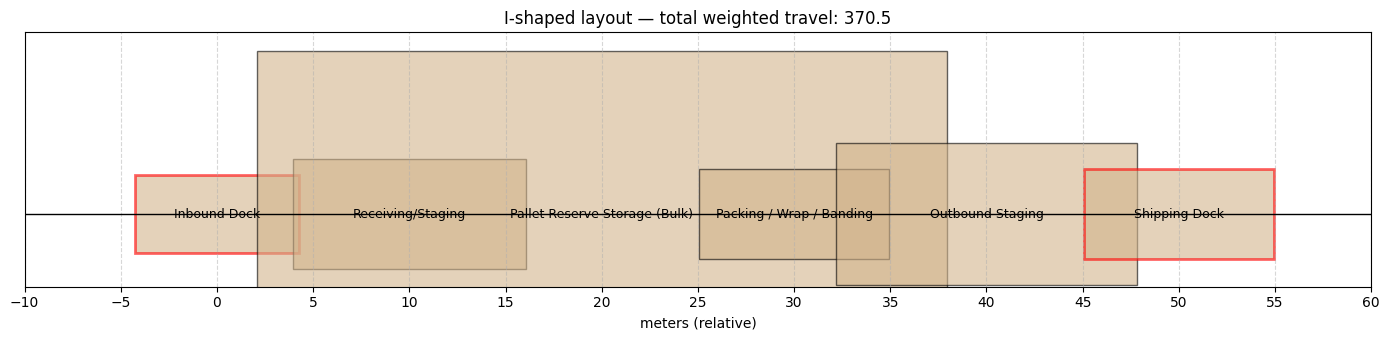

In [2]:
"""
I-shaped warehouse layout assignment script (fixed)
- Enforces Inbound Dock on leftmost slot and Shipping Dock on rightmost slot
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses exact enumeration for the non-fixed departments to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
areas = {
    "Inbound Dock": 2640,
    "Receiving/Staging": 5280,
    "Pallet Reserve Storage (Bulk)": 46340,
    "Packing / Wrap / Banding": 3520,
    "Outbound Staging": 5280 + 3520,  # join the two outbound areas (2-man + parcel)
    "Shipping Dock": 3520
}

dept_names = list(areas.keys())

# -----------------------------
# Full SLP adjacency table (as in problem) - we'll extract relevant pairs
# -----------------------------
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}

header = ["Inbound Dock","Receiving/Staging","QA & Technical Test","Cross-Dock","Pallet Reserve Storage (Bulk)",
          "Oversize/Non-Standard Storage","Packing / Wrap / Banding","Outbound Staging — Parcel",
          "Outbound Staging — 2-Man Delivery","Shipping Dock","Empty Pallets & Dunnage",
          "Maintenance & Battery Charge","Returns & WEEE","Spare Parts & Accessories Cage"]

matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

# Build SLP numeric dictionary
slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

# Combine outbound parcel & 2-man into one "Outbound Staging" by taking the max SLP code
def get_combined_slp(a, b):
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    def candidates(name):
        if name == "Outbound Staging":
            return [outbound_parcel, outbound_2man]
        else:
            return [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

# Build final flow weights for reduced set and scale by area factor
avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i == j:
            flow[i][j] = 0.0
        else:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor

# Symmetrize (take max)
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# I-shaped slot definition
# -----------------------------
n = len(dept_names)
slot_spacing = 10.0  # meters between slot centers
I_slots = [(i * slot_spacing, 0.0) for i in range(n)]  # left (0) to right (n-1)

# Fixed slots:
fixed_slot_for = {
    "Inbound Dock": 0,
    "Shipping Dock": n - 1
}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]

# Available slots for non-fixed departments
all_slots = list(range(n))
available_slots = [s for s in all_slots if s not in fixed_slot_for.values()]

# -----------------------------
# Objective function (Manhattan * flow)
# -----------------------------
def total_weighted_travel(assign):
    """assign: dict dept -> slot_index"""
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j:
                continue
            si = assign[i]
            sj = assign[j]
            dx = abs(I_slots[si][0] - I_slots[sj][0])
            dy = abs(I_slots[si][1] - I_slots[sj][1])
            d = dx + dy
            total += flow[i][j] * d
    return total

# -----------------------------
# Exact assignment by enumeration of permutations (since non-fixed count is small)
# -----------------------------
best_assign = None
best_obj = float("inf")

for perm in itertools.permutations(available_slots, len(non_fixed_depts)):
    assign = {}
    # apply fixed assignments
    for d, s in fixed_slot_for.items():
        assign[d] = s
    # apply this permutation to non-fixed departments in a fixed order
    for d, s in zip(non_fixed_depts, perm):
        assign[d] = s
    obj = total_weighted_travel(assign)
    if obj < best_obj:
        best_obj = obj
        best_assign = assign.copy()

# Print results
print("Best total weighted travel (I-shaped, exact): {:.6f}".format(best_obj))
print("Assignments (department -> slot index -> x[m]):")
for d in dept_names:
    s = best_assign[d]
    x, y = I_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"  {d:40s} -> slot {s:2d}  x={x:6.1f}m {fixed_note}")

# -----------------------------
# Visualization (I-shaped with relative meters and consistent style)
# -----------------------------
def plot_i_shape(assign, filename="i_shape_layout.png"):
    plt.figure(figsize=(14,3.5))
    ax = plt.gca()
    
    # Draw horizontal baseline
    xs = [p[0] for p in I_slots]
    ax.hlines(0, min(xs)-slot_spacing, max(xs)+slot_spacing, colors="black", linewidth=1)

    # Plot department rectangles
    for d in dept_names:
        s = assign[d]
        cx, cy = I_slots[s]
        w = max(4.0, math.sqrt(areas[d]) / 6.0)
        h = max(2.5, math.sqrt(areas[d]) / 12.0)
        rect = plt.Rectangle((cx - w/2, cy - h/2), w, h,
                             edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)

    # Axis limits
    ax.set_ylim(-4, 10)
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)

    # Aspect ratio
    ax.set_aspect("auto")  # keep horizontal stretch
     
    # Relative meter ticks on x-axis
    x_ticks = np.arange(math.floor(min(xs)-slot_spacing),
                        math.ceil(max(xs)+slot_spacing)+1, 5)
    ax.set_xticks(x_ticks)
    ax.set_xlabel("meters (relative)")

    # Gridlines
    ax.grid(True, linestyle='--', alpha=0.5, axis='x')

    # Remove y-ticks for clarity
    ax.set_yticks([])

    # Title
    ax.set_title(f"I-shaped layout — total weighted travel: {best_obj:.1f}")

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()



plot_i_shape(best_assign)

Best total weighted travel (L-shaped, exact): 397.660485
Assignments (department -> slot index -> coord):
  Inbound Dock                             -> slot  0  (0.0,0.0) (fixed)
  Receiving/Staging                        -> slot  2  (20.0,0.0) 
  Pallet Reserve Storage (Bulk)            -> slot  3  (20.0,10.0) 
  Packing / Wrap / Banding                 -> slot  4  (20.0,20.0) 
  Outbound Staging                         -> slot  5  (20.0,30.0) 
  Shipping Dock                            -> slot  6  (20.0,40.0) (fixed)
Saved plot to l_shape_layout.png


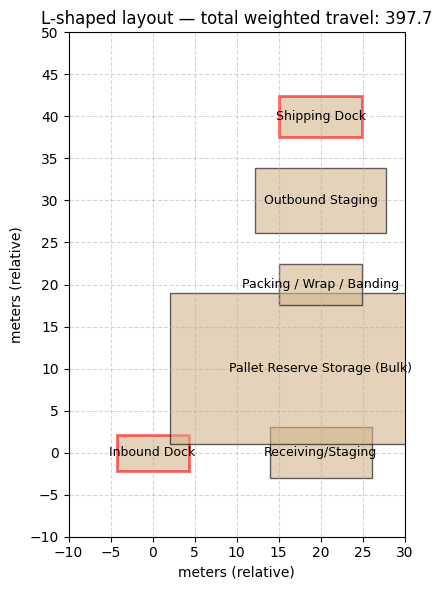

In [5]:
"""
L-shaped warehouse layout assignment script (fixed)
- Enforces Inbound Dock on bottom-left slot and Shipping Dock on top of vertical leg
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses exact enumeration for the non-fixed departments to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
areas = {
    "Inbound Dock": 2640,
    "Receiving/Staging": 5280,
    "Pallet Reserve Storage (Bulk)": 46340,
    "Packing / Wrap / Banding": 3520,
    "Outbound Staging": 5280 + 3520,
    "Shipping Dock": 3520
}

dept_names = list(areas.keys())

# -----------------------------
# Flow weights (reuse logic from I-shaped)
# -----------------------------
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}

header = ["Inbound Dock","Receiving/Staging","QA & Technical Test","Cross-Dock","Pallet Reserve Storage (Bulk)",
          "Oversize/Non-Standard Storage","Packing / Wrap / Banding","Outbound Staging — Parcel",
          "Outbound Staging — 2-Man Delivery","Shipping Dock","Empty Pallets & Dunnage",
          "Maintenance & Battery Charge","Returns & WEEE","Spare Parts & Accessories Cage"]

matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

def get_combined_slp(a, b):
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    def candidates(name):
        return [outbound_parcel, outbound_2man] if name == "Outbound Staging" else [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i != j:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# L-shaped slot definition
# -----------------------------
n = len(dept_names)
slot_spacing = 10.0
bottom = [(i * slot_spacing, 0.0) for i in range(3)]
vertical = [(2 * slot_spacing, j * slot_spacing) for j in range(1, n-2+1)]
L_slots = bottom + vertical  # total 6 slots

fixed_slot_for = {
    "Inbound Dock": 0,                # bottom-left
    "Shipping Dock": len(L_slots)-1   # top of vertical
}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]
available_slots = [s for s in range(n) if s not in fixed_slot_for.values()]

# -----------------------------
# Objective function
# -----------------------------
def total_weighted_travel(assign):
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j: 
                continue
            si, sj = assign[i], assign[j]
            dx = abs(L_slots[si][0] - L_slots[sj][0])
            dy = abs(L_slots[si][1] - L_slots[sj][1])
            total += flow[i][j] * (dx + dy)
    return total

# -----------------------------
# Enumeration
# -----------------------------
best_assign = None
best_obj = float("inf")

for perm in itertools.permutations(available_slots, len(non_fixed_depts)):
    assign = dict(fixed_slot_for)
    for d, s in zip(non_fixed_depts, perm):
        assign[d] = s
    obj = total_weighted_travel(assign)
    if obj < best_obj:
        best_obj = obj
        best_assign = assign.copy()

print("Best total weighted travel (L-shaped, exact): {:.6f}".format(best_obj))
print("Assignments (department -> slot index -> coord):")
for d in dept_names:
    s = best_assign[d]
    x, y = L_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"  {d:40s} -> slot {s:2d}  ({x:.1f},{y:.1f}) {fixed_note}")

# -----------------------------
# Visualization (L-shaped with relative meters and consistent style)
# -----------------------------
def plot_l_shape(assign, filename="l_shape_layout.png"):
    plt.figure(figsize=(6,6))
    ax = plt.gca()

    # Draw department rectangles
    for d in dept_names:
        s = assign[d]
        cx, cy = L_slots[s]
        w = max(4.0, math.sqrt(areas[d]) / 6.0)
        h = max(2.5, math.sqrt(areas[d]) / 12.0)
        rect = plt.Rectangle((cx - w/2, cy - h/2), w, h,
                             edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)

    # Axis limits
    xs = [p[0] for p in L_slots]
    ys = [p[1] for p in L_slots]
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)
    ax.set_ylim(min(ys)-slot_spacing, max(ys)+slot_spacing)

    # Aspect ratio
    ax.set_aspect("equal")

    # Relative meter ticks
    x_ticks = np.arange(math.floor(min(xs)-slot_spacing), math.ceil(max(xs)+slot_spacing)+1, 5)
    y_ticks = np.arange(math.floor(min(ys)-slot_spacing), math.ceil(max(ys)+slot_spacing)+1, 5)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xlabel("meters (relative)")
    ax.set_ylabel("meters (relative)")

    # Optional grid
    ax.grid(True, linestyle='--', alpha=0.5)

    # Title
    ax.set_title(f"L-shaped layout — total weighted travel: {best_obj:.1f}")

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"Saved plot to {filename}")
    plt.show()



plot_l_shape(best_assign)

Best total weighted travel (U-shaped, exact): 323.366619
Assignments (department -> slot index -> coord):
  Inbound Dock                             -> slot  0  (0.0,0.0) (fixed)
  Receiving/Staging                        -> slot  4  (20.0,20.0) 
  Pallet Reserve Storage (Bulk)            -> slot  5  (30.0,20.0) 
  Packing / Wrap / Banding                 -> slot  6  (30.0,20.0) 
  Outbound Staging                         -> slot  3  (10.0,20.0) 
  Shipping Dock                            -> slot  2  (0.0,20.0) (fixed)
Saved plot to u_shape_layout.png


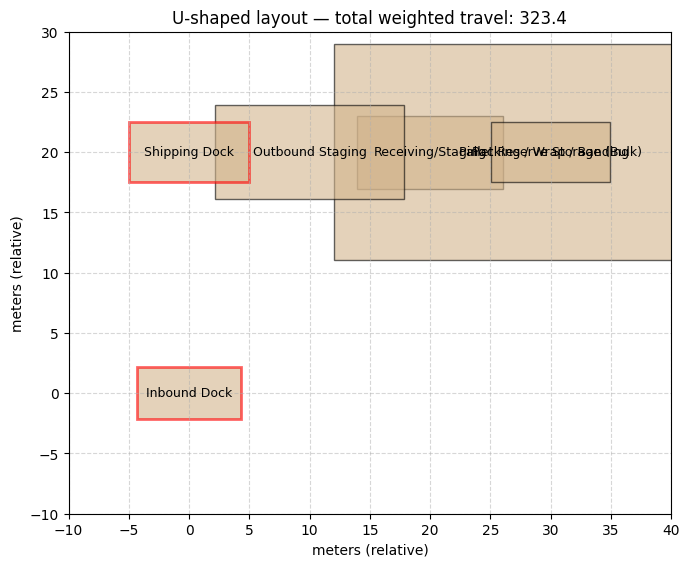

In [3]:
"""
U-shaped warehouse layout assignment script (fixed)
- Enforces Inbound Dock on bottom-left of left leg and Shipping Dock on top of left leg
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses exact enumeration for the non-fixed departments to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import itertools
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
areas = {
    "Inbound Dock": 2640,
    "Receiving/Staging": 5280,
    "Pallet Reserve Storage (Bulk)": 46340,
    "Packing / Wrap / Banding": 3520,
    "Outbound Staging": 5280 + 3520,
    "Shipping Dock": 3520
}

dept_names = list(areas.keys())

# -----------------------------
# Flow weights (reuse logic from I-shaped)
# -----------------------------
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}

header = ["Inbound Dock","Receiving/Staging","QA & Technical Test","Cross-Dock","Pallet Reserve Storage (Bulk)",
          "Oversize/Non-Standard Storage","Packing / Wrap / Banding","Outbound Staging — Parcel",
          "Outbound Staging — 2-Man Delivery","Shipping Dock","Empty Pallets & Dunnage",
          "Maintenance & Battery Charge","Returns & WEEE","Spare Parts & Accessories Cage"]

matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

def get_combined_slp(a, b):
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    def candidates(name):
        return [outbound_parcel, outbound_2man] if name == "Outbound Staging" else [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i != j:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# U-shaped slot definition
# -----------------------------
n = len(dept_names)
slot_spacing = 10.0

# Left vertical leg
left_leg = [(0.0, i * slot_spacing) for i in range(3)]
# Bottom horizontal leg
bottom_leg = [(i * slot_spacing, 2 * slot_spacing) for i in range(1, 4)]
# Right vertical leg
right_leg = [(3 * slot_spacing, i * slot_spacing) for i in range(2, -1, -1)]

U_slots = left_leg + bottom_leg + right_leg
assert len(U_slots) >= n, "Not enough slots for all departments!"

# Fixed departments: inbound and shipping on left vertical
fixed_slot_for = {
    "Inbound Dock": 0,               # bottom-left of U (left leg)
    "Shipping Dock": 2                # top of left leg
}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]
available_slots = [s for s in range(len(U_slots)) if s not in fixed_slot_for.values()]

# -----------------------------
# Objective function
# -----------------------------
def total_weighted_travel(assign):
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j: 
                continue
            si, sj = assign[i], assign[j]
            dx = abs(U_slots[si][0] - U_slots[sj][0])
            dy = abs(U_slots[si][1] - U_slots[sj][1])
            total += flow[i][j] * (dx + dy)
    return total

# -----------------------------
# Enumeration
# -----------------------------
best_assign = None
best_obj = float("inf")

for perm in itertools.permutations(available_slots, len(non_fixed_depts)):
    assign = dict(fixed_slot_for)
    for d, s in zip(non_fixed_depts, perm):
        assign[d] = s
    obj = total_weighted_travel(assign)
    if obj < best_obj:
        best_obj = obj
        best_assign = assign.copy()

print("Best total weighted travel (U-shaped, exact): {:.6f}".format(best_obj))
print("Assignments (department -> slot index -> coord):")
for d in dept_names:
    s = best_assign[d]
    x, y = U_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"  {d:40s} -> slot {s:2d}  ({x:.1f},{y:.1f}) {fixed_note}")

# -----------------------------
# Visualization with relative meters
# -----------------------------
def plot_u_shape(assign, filename="u_shape_layout.png"):
    plt.figure(figsize=(7,6))
    ax = plt.gca()
    
    # Draw department rectangles
    for d in dept_names:
        s = assign[d]
        cx, cy = U_slots[s]
        w = max(4.0, math.sqrt(areas[d]) / 6.0)
        h = max(2.5, math.sqrt(areas[d]) / 12.0)
        rect = plt.Rectangle((cx - w/2, cy - h/2), w, h,
                             edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)
    
    # Set axis limits with spacing
    xs = [p[0] for p in U_slots]
    ys = [p[1] for p in U_slots]
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)
    ax.set_ylim(min(ys)-slot_spacing, max(ys)+slot_spacing)
    
    # Aspect ratio
    ax.set_aspect("equal")
    
    # Add ticks as relative meters
    x_ticks = np.arange(math.floor(min(xs)-slot_spacing), math.ceil(max(xs)+slot_spacing)+1, 5)
    y_ticks = np.arange(math.floor(min(ys)-slot_spacing), math.ceil(max(ys)+slot_spacing)+1, 5)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_xlabel("meters (relative)")
    ax.set_ylabel("meters (relative)")
    
    # Optional: add grid for easier visualization
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Title
    ax.set_title(f"U-shaped layout — total weighted travel: {best_obj:.1f}")
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"Saved plot to {filename}")
    plt.show()


plot_u_shape(best_assign)

Part 3: Extended version of part 2

Best total weighted travel (I-shaped): 2168.6050
Assignments (dept -> slot index -> x[m]):
  Inbound Dock                             -> slot  0  x=   0.0m (fixed)
  Receiving/Staging                        -> slot  6  x=  60.0m 
  QA & Technical Test                      -> slot  3  x=  30.0m 
  Cross-Dock                               -> slot 11  x= 110.0m 
  Pallet Reserve Storage (Bulk)            -> slot  7  x=  70.0m 
  Oversize/Non-Standard Storage            -> slot  9  x=  90.0m 
  Packing / Wrap / Banding                 -> slot  8  x=  80.0m 
  Outbound Staging — Parcel                -> slot 12  x= 120.0m 
  Outbound Staging — 2-Man Delivery        -> slot 10  x= 100.0m 
  Shipping Dock                            -> slot 13  x= 130.0m (fixed)
  Empty Pallets & Dunnage                  -> slot  4  x=  40.0m 
  Maintenance & Battery Charge             -> slot  5  x=  50.0m 
  Returns & WEEE                           -> slot  2  x=  20.0m 
  Spare Parts & Accessories Cage     

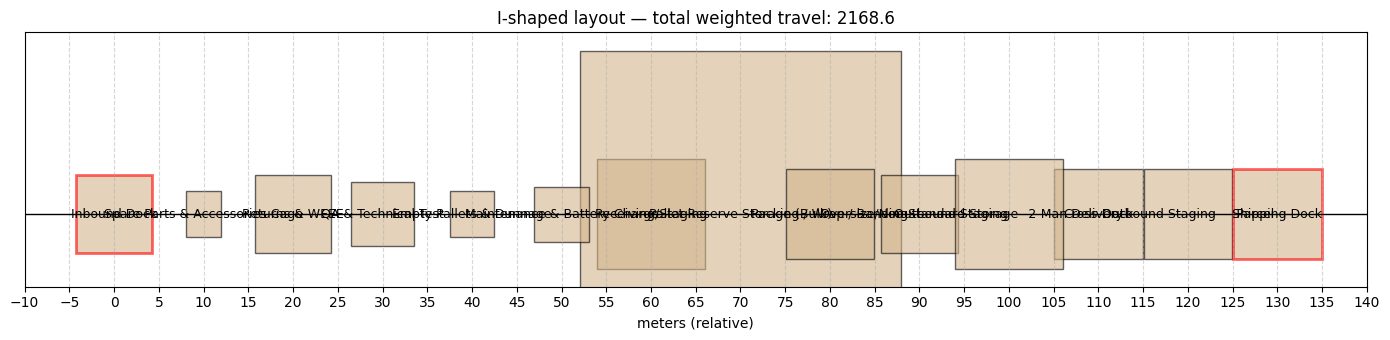

In [4]:
"""
I-shaped warehouse layout assignment script
- Enforces Inbound Dock on leftmost slot and Shipping Dock on rightmost slot
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses a simple randomized swap local-search to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import random
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
# We use the 6 required departments (Outbound joined)
areas = {
"Inbound Dock": 2640,
"Receiving/Staging": 5280,
"QA & Technical Test": 1760,
"Cross-Dock": 3520,
"Pallet Reserve Storage (Bulk)": 46340,
"Oversize/Non-Standard Storage": 2640,
"Packing / Wrap / Banding": 3520,
"Outbound Staging — Parcel": 3520,
"Outbound Staging — 2-Man Delivery": 5280,
"Shipping Dock": 3520,
"Empty Pallets & Dunnage": 880,
"Maintenance & Battery Charge": 1320,
"Returns & WEEE": 2640,
"Spare Parts & Accessories Cage": 440
}

dept_names = list(areas.keys())

# -----------------------------
# Full SLP adjacency table (as in problem) - we'll extract relevant pairs
# -----------------------------
# Legend
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}

# Header order from the SLP table (full set)
header = ["Inbound Dock","Receiving/Staging","QA & Technical Test","Cross-Dock","Pallet Reserve Storage (Bulk)",
          "Oversize/Non-Standard Storage","Packing / Wrap / Banding","Outbound Staging — Parcel",
          "Outbound Staging — 2-Man Delivery","Shipping Dock","Empty Pallets & Dunnage",
          "Maintenance & Battery Charge","Returns & WEEE","Spare Parts & Accessories Cage"]

# Matrix rows copied from the problem statement (codes)
matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

# Build SLP numeric matrix dictionary for the header set
slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

# For our reduced department set, we must combine outbound parcel and 2-man into one
# To approximate the joined adjacency, we take the max weight of the two outbound variants to each other department.
def get_combined_slp(a, b):
    """
    Return SLP weight between a and b where a or b might be 'Outbound Staging'
    which is a combination of 'Outbound Staging — Parcel' and 'Outbound Staging — 2-Man Delivery'
    """
    # mapping for outbound combined
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    # helpers: if argument is outbound combined, produce both possibilities
    def candidates(name):
        if name == "Outbound Staging":
            return [outbound_parcel, outbound_2man]
        else:
            return [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

# Build final flow weights matrix for the reduced set (symmetric)
# Also scale by area factor (similar to earlier approach)
avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i == j:
            flow[i][j] = 0.0
        else:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor

# Ensure symmetry (take max of both directions)
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# I-shaped slot definition
# -----------------------------
n = len(dept_names)
slot_spacing = 10.0  # meters between slot centers
I_slots = [(i * slot_spacing, 0.0) for i in range(n)]  # left (0) to right (n-1)

# Fixed slots:
# - Inbound Dock -> leftmost (slot 0)
# - Shipping Dock -> rightmost (slot n-1)
fixed_slot_for = {
    "Inbound Dock": 0,
    "Shipping Dock": n - 1
}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]

# -----------------------------
# Objective function (Manhattan * flow)
# -----------------------------
def total_weighted_travel(assign):
    """assign: dict dept -> slot_index"""
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j: 
                continue
            si = assign[i]
            sj = assign[j]
            dx = abs(I_slots[si][0] - I_slots[sj][0])
            dy = abs(I_slots[si][1] - I_slots[sj][1])
            d = dx + dy
            total += flow[i][j] * d
    return total

# -----------------------------
# Local-search with random restarts (respecting fixed assignments)
# -----------------------------
def solve_i_shape(num_restarts=500, max_no_improve=500):
    best_assign = None
    best_cost = float("inf")
    slots = list(range(n))
    # Pre-occupied slots by fixed departments:
    fixed_occupied = {fixed_slot_for[d]: d for d in fixed_slot_for}
    # Candidate slots available to non-fixed depts
    available_slots = [s for s in slots if s not in fixed_occupied]
    for restart in range(num_restarts):
        # initial random assignment for non-fixed departments
        perm = available_slots.copy()
        random.shuffle(perm)
        assign = {}
        # fixed assignments
        for d, s in fixed_slot_for.items():
            assign[d] = s
        # assign remaining depts to remaining slots
        for idx, d in enumerate(non_fixed_depts):
            assign[d] = perm[idx]
        current_cost = total_weighted_travel(assign)
        no_improve = 0
        # try pairwise swaps among non-fixed departments
        while no_improve < max_no_improve:
            # choose two non-fixed departments to try swapping slots
            a, b = random.sample(non_fixed_depts, 2)
            # swap their assigned slots
            new_assign = assign.copy()
            new_assign[a], new_assign[b] = assign[b], assign[a]
            new_cost = total_weighted_travel(new_assign)
            if new_cost < current_cost - 1e-9:
                assign = new_assign
                current_cost = new_cost
                no_improve = 0
            else:
                no_improve += 1
        # record best
        if current_cost < best_cost:
            best_cost = current_cost
            best_assign = assign.copy()
    return best_assign, best_cost

# -----------------------------
# Run solver
# -----------------------------
random.seed(42)
assign, best_obj = solve_i_shape(num_restarts=600, max_no_improve=300)
print("Best total weighted travel (I-shaped): {:.4f}".format(best_obj))
print("Assignments (dept -> slot index -> x[m]):")
for d in dept_names:
    s = assign[d]
    x, y = I_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"  {d:40s} -> slot {s:2d}  x={x:6.1f}m {fixed_note}")

# -----------------------------
# Visualization (I-shaped with relative meters and consistent style)
# -----------------------------
def plot_i_shape(assign, filename="i_shape_layout.png"):
    plt.figure(figsize=(14,3.5))
    ax = plt.gca()
    
    # Draw horizontal baseline
    xs = [p[0] for p in I_slots]
    ax.hlines(0, min(xs)-slot_spacing, max(xs)+slot_spacing, colors="black", linewidth=1)

    # Plot department rectangles
    for d in dept_names:
        s = assign[d]
        cx, cy = I_slots[s]
        w = max(4.0, math.sqrt(areas[d]) / 6.0)
        h = max(2.5, math.sqrt(areas[d]) / 12.0)
        rect = plt.Rectangle((cx - w/2, cy - h/2), w, h,
                             edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)

    # Axis limits
    ax.set_ylim(-4, 10)
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)

    # Aspect ratio
    ax.set_aspect("auto")  # keep horizontal stretch
     
    # Relative meter ticks on x-axis
    x_ticks = np.arange(math.floor(min(xs)-slot_spacing),
                        math.ceil(max(xs)+slot_spacing)+1, 5)
    ax.set_xticks(x_ticks)
    ax.set_xlabel("meters (relative)")

    # Gridlines
    ax.grid(True, linestyle='--', alpha=0.5, axis='x')

    # Remove y-ticks for clarity
    ax.set_yticks([])

    # Title
    ax.set_title(f"I-shaped layout — total weighted travel: {best_obj:.1f}")

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_i_shape(assign)

Best total weighted travel (L-shaped): 2050.5210
Inbound Dock                             -> slot  0 (0.0,0.0) (fixed)
Receiving/Staging                        -> slot  7 (0.0,10.0) 
QA & Technical Test                      -> slot  3 (30.0,0.0) 
Cross-Dock                               -> slot 11 (0.0,50.0) 
Pallet Reserve Storage (Bulk)            -> slot  8 (0.0,20.0) 
Oversize/Non-Standard Storage            -> slot  5 (50.0,0.0) 
Packing / Wrap / Banding                 -> slot  9 (0.0,30.0) 
Outbound Staging — Parcel                -> slot 12 (0.0,60.0) 
Outbound Staging — 2-Man Delivery        -> slot 10 (0.0,40.0) 
Shipping Dock                            -> slot 13 (0.0,70.0) (fixed)
Empty Pallets & Dunnage                  -> slot  2 (20.0,0.0) 
Maintenance & Battery Charge             -> slot  1 (10.0,0.0) 
Returns & WEEE                           -> slot  4 (40.0,0.0) 
Spare Parts & Accessories Cage           -> slot  6 (60.0,0.0) 


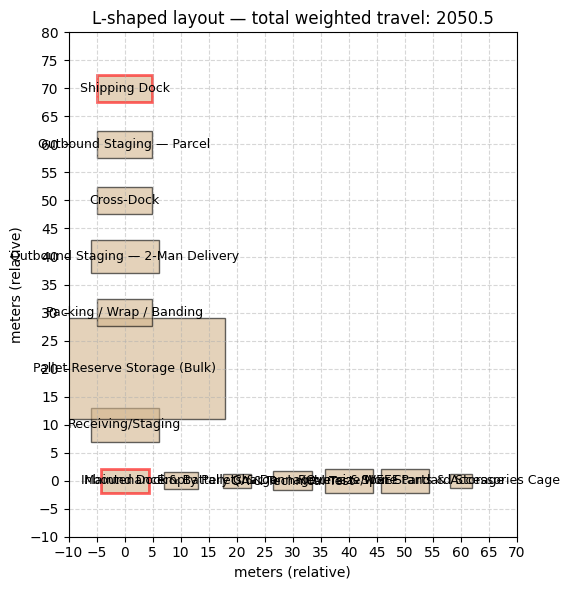

In [6]:
"""
L-shaped warehouse layout assignment script (heuristic)
- Enforces Inbound Dock on bottom-left slot and Shipping Dock on top of vertical leg
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses a randomized swap local-search to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import random
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
areas = {
"Inbound Dock": 2640,
"Receiving/Staging": 5280,
"QA & Technical Test": 1760,
"Cross-Dock": 3520,
"Pallet Reserve Storage (Bulk)": 46340,
"Oversize/Non-Standard Storage": 2640,
"Packing / Wrap / Banding": 3520,
"Outbound Staging — Parcel": 3520,
"Outbound Staging — 2-Man Delivery": 5280,
"Shipping Dock": 3520,
"Empty Pallets & Dunnage": 880,
"Maintenance & Battery Charge": 1320,
"Returns & WEEE": 2640,
"Spare Parts & Accessories Cage": 440
}

dept_names = list(areas.keys())

# -----------------------------
# SLP table
# -----------------------------
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}
header = dept_names
matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

# Combine Outbound Staging
def get_combined_slp(a, b):
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    def candidates(name):
        return [outbound_parcel, outbound_2man] if name == "Outbound Staging" else [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

# Build flow matrix
avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i != j:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# L-shaped slot generation
# -----------------------------
def generate_L_slots(n, slot_spacing=10.0):
    h_leg_len = max(2, n // 2)
    v_leg_len = n - h_leg_len
    bottom = [(i*slot_spacing, 0.0) for i in range(h_leg_len)]
    vertical = [(0.0, (j+1)*slot_spacing) for j in range(v_leg_len)]
    return bottom, vertical

n = len(dept_names)
slot_spacing = 10.0
bottom_slots, vertical_slots = generate_L_slots(n, slot_spacing)
L_slots = bottom_slots + vertical_slots

# Fixed slots
fixed_slot_for = {"Inbound Dock": 0, "Shipping Dock": len(L_slots)-1}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]

# -----------------------------
# Objective
# -----------------------------
def total_weighted_travel(assign):
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j: continue
            si, sj = assign[i], assign[j]
            dx = abs(L_slots[si][0] - L_slots[sj][0])
            dy = abs(L_slots[si][1] - L_slots[sj][1])
            total += flow[i][j] * (dx + dy)
    return total

# -----------------------------
# L-shape solver with proper 2D swaps
# -----------------------------
def solve_l_shape(num_restarts=600, max_no_improve=300):
    best_assign = None
    best_cost = float("inf")
    
    # Separate horizontal and vertical slots for initial assignment
    h_slots = list(range(len(bottom_slots)))
    v_slots = list(range(len(bottom_slots), len(L_slots)))
    
    for restart in range(num_restarts):
        assign = dict(fixed_slot_for)
        # Randomly assign half of remaining departments to horizontal and vertical
        remaining = non_fixed_depts.copy()
        random.shuffle(remaining)
        # Simple split: first half horizontal, rest vertical
        for d, s in zip(remaining[:len(h_slots)-1], [x for x in h_slots if x != fixed_slot_for.get("Inbound Dock", -1)]):
            assign[d] = s
        for d, s in zip(remaining[len(h_slots)-1:], [x for x in v_slots if x != fixed_slot_for.get("Shipping Dock", -1)]):
            assign[d] = s
        
        current_cost = total_weighted_travel(assign)
        no_improve = 0
        
        while no_improve < max_no_improve:
            a, b = random.sample(non_fixed_depts, 2)
            new_assign = assign.copy()
            new_assign[a], new_assign[b] = assign[b], assign[a]
            new_cost = total_weighted_travel(new_assign)
            if new_cost < current_cost - 1e-9:
                assign = new_assign
                current_cost = new_cost
                no_improve = 0
            else:
                no_improve += 1
                
        if current_cost < best_cost:
            best_cost = current_cost
            best_assign = assign.copy()
            
    return best_assign, best_cost

# -----------------------------
# Solve
# -----------------------------
random.seed(42)
assign, best_obj = solve_l_shape(num_restarts=600, max_no_improve=300)
print("Best total weighted travel (L-shaped): {:.4f}".format(best_obj))
for d in dept_names:
    s = assign[d]
    x, y = L_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"{d:40s} -> slot {s:2d} ({x:.1f},{y:.1f}) {fixed_note}")

# -----------------------------
# Visualization
# -----------------------------
def plot_l_shape(assign, filename="l_shape_layout.png"):
    plt.figure(figsize=(10,6))
    ax = plt.gca()
    for d in dept_names:
        s = assign[d]
        cx, cy = L_slots[s]
        w = max(4.0, math.sqrt(areas[d])/6.0)
        h = max(2.5, math.sqrt(areas[d])/12.0)
        rect = plt.Rectangle((cx-w/2, cy-h/2), w, h, edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)
    xs = [p[0] for p in L_slots]
    ys = [p[1] for p in L_slots]
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)
    ax.set_ylim(min(ys)-slot_spacing, max(ys)+slot_spacing)
    ax.set_aspect("equal")
    ax.set_xticks(np.arange(min(xs)-slot_spacing, max(xs)+slot_spacing+1, 5))
    ax.set_yticks(np.arange(min(ys)-slot_spacing, max(ys)+slot_spacing+1, 5))
    ax.set_xlabel("meters (relative)")
    ax.set_ylabel("meters (relative)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f"L-shaped layout — total weighted travel: {best_obj:.1f}")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_l_shape(assign)

Best total weighted travel (U-shaped): 1923.3950
Assignments (department -> slot index -> coord):
  Inbound Dock                             -> slot  0  (0.0,0.0) (fixed)
  Receiving/Staging                        -> slot  8  (50.0,30.0) 
  QA & Technical Test                      -> slot  7  (40.0,30.0) 
  Cross-Dock                               -> slot  5  (20.0,30.0) 
  Pallet Reserve Storage (Bulk)            -> slot 10  (60.0,30.0) 
  Oversize/Non-Standard Storage            -> slot 13  (60.0,0.0) 
  Packing / Wrap / Banding                 -> slot  9  (60.0,30.0) 
  Outbound Staging — Parcel                -> slot  6  (30.0,30.0) 
  Outbound Staging — 2-Man Delivery        -> slot  4  (10.0,30.0) 
  Shipping Dock                            -> slot  3  (0.0,30.0) (fixed)
  Empty Pallets & Dunnage                  -> slot 12  (60.0,10.0) 
  Maintenance & Battery Charge             -> slot 11  (60.0,20.0) 
  Returns & WEEE                           -> slot  2  (0.0,20.0) 
  Spare P

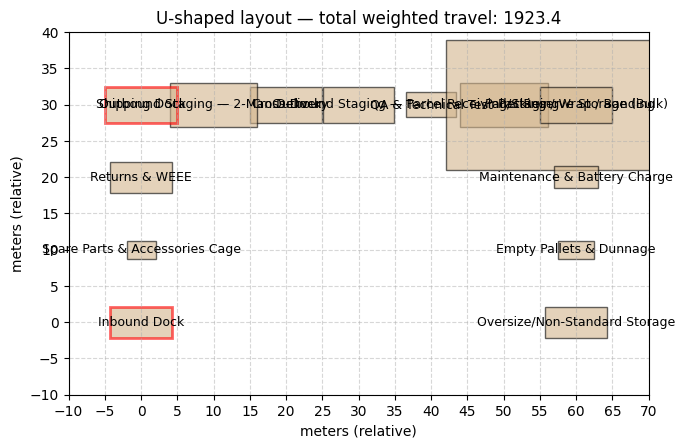

In [7]:
"""
U-shaped warehouse layout assignment script (heuristic)
- Enforces Inbound Dock on bottom-left of left leg and Shipping Dock on top of left leg
- Combines Outbound Staging (Parcel + 2-man) into a single department "Outbound Staging"
- Converts SLP adjacency codes to numeric flows (E=4, A=3, I=2, O=1, U=0)
- Uses randomized swap local-search to minimize total weighted travel
- Visualizes the final assignment and saves a PNG
"""

import random
import math
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Departments and areas (m2)
# -----------------------------
areas = {
"Inbound Dock": 2640,
"Receiving/Staging": 5280,
"QA & Technical Test": 1760,
"Cross-Dock": 3520,
"Pallet Reserve Storage (Bulk)": 46340,
"Oversize/Non-Standard Storage": 2640,
"Packing / Wrap / Banding": 3520,
"Outbound Staging — Parcel": 3520,
"Outbound Staging — 2-Man Delivery": 5280,
"Shipping Dock": 3520,
"Empty Pallets & Dunnage": 880,
"Maintenance & Battery Charge": 1320,
"Returns & WEEE": 2640,
"Spare Parts & Accessories Cage": 440
}

dept_names = list(areas.keys())

# -----------------------------
# SLP adjacency table
# -----------------------------
legend = {"E":4, "A":3, "I":2, "O":1, "U":0, "X":-4}

header = ["Inbound Dock","Receiving/Staging","QA & Technical Test","Cross-Dock","Pallet Reserve Storage (Bulk)",
          "Oversize/Non-Standard Storage","Packing / Wrap / Banding","Outbound Staging — Parcel",
          "Outbound Staging — 2-Man Delivery","Shipping Dock","Empty Pallets & Dunnage",
          "Maintenance & Battery Charge","Returns & WEEE","Spare Parts & Accessories Cage"]

matrix_rows = [
    ["-","E","U","U","U","U","U","U","U","U","U","U","U","U"],
    ["E","-","A","A","I","U","U","U","U","U","I","U","U","U"],
    ["U","A","-","U","U","U","U","U","U","U","U","U","I","U"],
    ["U","A","U","-","U","U","U","A","A","A","U","U","U","U"],
    ["U","I","U","U","-","U","E","U","U","U","U","O","U","U"],
    ["U","U","U","U","U","-","I","U","U","U","U","U","U","U"],
    ["U","U","U","U","E","I","-","E","E","U","O","U","O","U"],
    ["U","U","U","A","U","U","E","-","U","E","U","U","U","U"],
    ["U","U","U","A","U","U","E","U","-","E","U","U","U","U"],
    ["U","U","U","A","U","U","U","E","E","-","U","U","U","U"],
    ["U","I","U","U","U","U","O","U","U","U","-","U","U","U"],
    ["U","U","U","U","O","U","U","U","U","U","U","-","U","U"],
    ["U","U","I","U","U","U","O","U","U","U","U","U","-","U"],
    ["U","U","U","U","U","U","U","U","U","U","U","U","U","-"]
]

slp_numeric = {}
for i, r in enumerate(header):
    for j, c in enumerate(header):
        code = matrix_rows[i][j]
        weight = 0 if code == "-" else legend.get(code, 0)
        slp_numeric[(r, c)] = weight

def get_combined_slp(a, b):
    outbound_parcel = "Outbound Staging — Parcel"
    outbound_2man  = "Outbound Staging — 2-Man Delivery"
    def candidates(name):
        return [outbound_parcel, outbound_2man] if name == "Outbound Staging" else [name]
    best = 0
    for na in candidates(a):
        for nb in candidates(b):
            if (na, nb) in slp_numeric:
                best = max(best, slp_numeric[(na, nb)])
            elif (nb, na) in slp_numeric:
                best = max(best, slp_numeric[(nb, na)])
    return best

# -----------------------------
# Flow weights (area-adjusted)
# -----------------------------
avg_area = np.mean(list(areas.values()))
flow = {i: {j: 0.0 for j in dept_names} for i in dept_names}
for i in dept_names:
    for j in dept_names:
        if i != j:
            slp_w = get_combined_slp(i, j)
            area_factor = (areas[i] + areas[j]) / (2 * avg_area)
            flow[i][j] = slp_w * area_factor
for i in dept_names:
    for j in dept_names:
        flow[i][j] = max(flow[i][j], flow[j][i])

# -----------------------------
# U-shaped slot generation
# -----------------------------
def generate_U_slots(n, slot_spacing=10.0):
    """
    Generate a proper 'U' shape:
    - Left vertical leg from bottom to top
    - Bottom horizontal leg connecting left and right
    - Right vertical leg from top to bottom (aligned with left leg height)
    """
    # Determine leg sizes
    left_leg_len = max(2, n // 3)
    right_leg_len = left_leg_len
    bottom_len = n - left_leg_len - right_leg_len

    # Left vertical leg (bottom to top)
    left_leg = [(0.0, i*slot_spacing) for i in range(left_leg_len)]

    # Bottom horizontal leg (left to right)
    bottom_y = 0.0
    if left_leg:
        bottom_y = left_leg[-1][1]
    bottom_leg = [(i*slot_spacing, bottom_y) for i in range(1, bottom_len+1)]

    # Right vertical leg (top to bottom)
    right_x = bottom_leg[-1][0] if bottom_leg else left_leg[-1][0] + slot_spacing
    right_leg = [(right_x, bottom_y - i*slot_spacing) for i in range(right_leg_len)]

    return left_leg + bottom_leg + right_leg


slot_spacing = 10.0
U_slots = generate_U_slots(len(dept_names), slot_spacing)

# -----------------------------
# Fixed departments: left leg
# -----------------------------
fixed_slot_for = {"Inbound Dock": 0, "Shipping Dock": len(U_slots)//3 - 1}
fixed_departments = set(fixed_slot_for.keys())
non_fixed_depts = [d for d in dept_names if d not in fixed_departments]
available_slots = [s for s in range(len(U_slots)) if s not in fixed_slot_for.values()]

# -----------------------------
# Objective function
# -----------------------------
def total_weighted_travel(assign):
    total = 0.0
    for i in dept_names:
        for j in dept_names:
            if i == j: continue
            si, sj = assign[i], assign[j]
            dx = abs(U_slots[si][0] - U_slots[sj][0])
            dy = abs(U_slots[si][1] - U_slots[sj][1])
            total += flow[i][j] * (dx + dy)
    return total

# -----------------------------
# Local-search heuristic (like I/L shape)
# -----------------------------
def solve_u_shape(num_restarts=600, max_no_improve=300):
    best_assign = None
    best_cost = float("inf")
    
    for restart in range(num_restarts):
        assign = dict(fixed_slot_for)
        perm = available_slots.copy()
        random.shuffle(perm)
        for d, s in zip(non_fixed_depts, perm):
            assign[d] = s
        
        current_cost = total_weighted_travel(assign)
        no_improve = 0
        
        while no_improve < max_no_improve:
            a, b = random.sample(non_fixed_depts, 2)
            new_assign = assign.copy()
            new_assign[a], new_assign[b] = assign[b], assign[a]
            new_cost = total_weighted_travel(new_assign)
            if new_cost < current_cost - 1e-9:
                assign = new_assign
                current_cost = new_cost
                no_improve = 0
            else:
                no_improve += 1
        
        if current_cost < best_cost:
            best_cost = current_cost
            best_assign = assign.copy()
            
    return best_assign, best_cost

# -----------------------------
# Solve and print results
# -----------------------------
random.seed(42)
assign, best_obj = solve_u_shape()
print("Best total weighted travel (U-shaped): {:.4f}".format(best_obj))
print("Assignments (department -> slot index -> coord):")
for d in dept_names:
    s = assign[d]
    x, y = U_slots[s]
    fixed_note = "(fixed)" if d in fixed_departments else ""
    print(f"  {d:40s} -> slot {s:2d}  ({x:.1f},{y:.1f}) {fixed_note}")

# -----------------------------
# Visualization
# -----------------------------
def plot_u_shape(assign, filename="u_shape_layout.png"):
    plt.figure(figsize=(7,6))
    ax = plt.gca()
    for d in dept_names:
        s = assign[d]
        cx, cy = U_slots[s]
        w = max(4.0, math.sqrt(areas[d])/6.0)
        h = max(2.5, math.sqrt(areas[d])/12.0)
        rect = plt.Rectangle((cx-w/2, cy-h/2), w, h, edgecolor="black", facecolor="tan", alpha=0.6)
        ax.add_patch(rect)
        ax.text(cx, cy, d, ha="center", va="center", fontsize=9)
        if d in fixed_departments:
            rect.set_edgecolor("red")
            rect.set_linewidth(2.0)
    xs = [p[0] for p in U_slots]
    ys = [p[1] for p in U_slots]
    ax.set_xlim(min(xs)-slot_spacing, max(xs)+slot_spacing)
    ax.set_ylim(min(ys)-slot_spacing, max(ys)+slot_spacing)
    ax.set_aspect("equal")
    ax.set_xticks(np.arange(math.floor(min(xs)-slot_spacing), math.ceil(max(xs)+slot_spacing)+1, 5))
    ax.set_yticks(np.arange(math.floor(min(ys)-slot_spacing), math.ceil(max(ys)+slot_spacing)+1, 5))
    ax.set_xlabel("meters (relative)")
    ax.set_ylabel("meters (relative)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f"U-shaped layout — total weighted travel: {best_obj:.1f}")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_u_shape(assign)